<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Apa itu Colaboratory?</h1>

Colaboratory, disingkat "Colab", memungkinkan Anda menulis dan mengeksekusi Python di browser Anda dengan beberapa keuntungan berikut:
- Tidak memerlukan konfigurasi
- Akses gratis ke GPU
- Berbagi dengan mudah

Apakah Anda seorang <strong>pelajar</strong>, <strong>data scientist</strong>, atau <strong>peneliti AI</strong>, Colab dapat memudahkan pekerjaan Anda. Tonton <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Pengantar Colab</a> untuk mempelajari lebih lanjut, atau langsung mulai di bawah ini.

In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from IPython.display import display,Markdown,HTML
import warnings
warnings.filterwarnings('ignore')

In [ ]:
 df = pd.read_csv('data.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
 df.shape

(511, 14)

In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [ ]:
 df.duplicated().sum()

0

In [ ]:
 df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
 df = df.dropna()

In [ ]:
 target_column = "MEDV"
 
df_all = df.copy()

In [ ]:
 def plot_pie(column, title="All"):
    fig,axs = plt.subplots(1,1)
    data = df_all[column].value_counts()
    plt.pie(data,autopct='%1.2f%%',labels=data.index)
    plt.title(title)
    plt.show()
    
def plot_hist(column, title="All"):
    plt.hist(df_all[column],density=True)
    plt.title(title)
    plt.show()
 
def plot_bar(column, sort=False, title="all"):
    if sort:
        data_all = df_all[column].value_counts().sort_index()
    else:
        data_all = df_all[column].value_counts()
    plt.bar(data_all.index.astype(str),data_all)
    plt.title(title)
    plt.show()
 
def plot_boxplot(column, title=""):
    ax = sns.boxplot(y=column,data=df)
    plt.show()

In [ ]:
 def eda(df):
    display(HTML('<h1>Exploratory Data Analysis<h1>'))
    
    for column in df.columns:
        display(HTML('<h2>{}<h2>'.format(column)))
        if df[column].dtype == 'int64' or df[column].dtype == 'float64':
            if df[column].nunique()>10 :
                df[column].describe()
                plot_hist(column)
                plot_boxplot(column)
            else:
                plot_bar(column)
                plot_pie(column)
        elif df[column].dtype == 'object':
            if df[column].nunique()>10 :
                df[column].value_counts().head(5)
            else:
                plot_bar(column)
                plot_pie(column)
        else:
            None

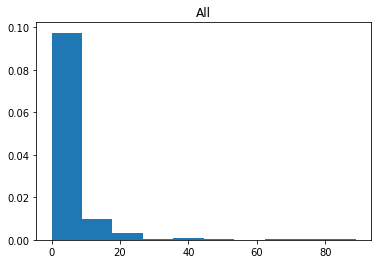

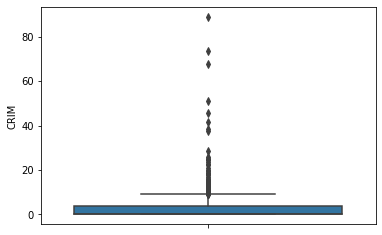

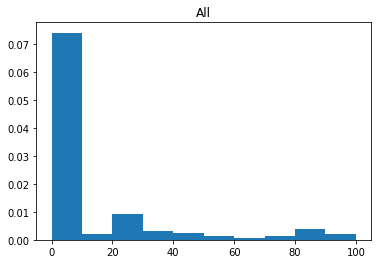

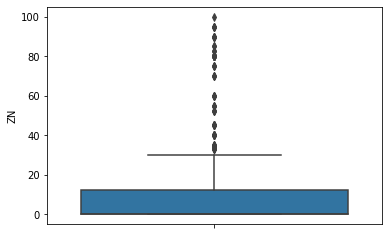

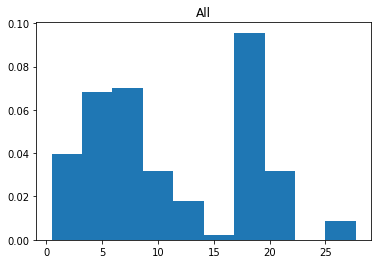

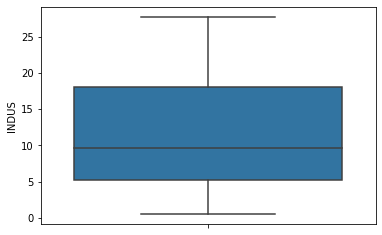

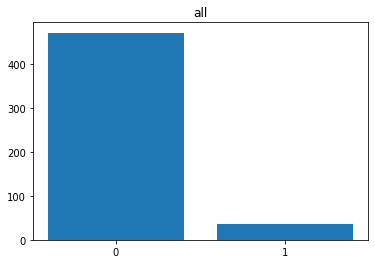

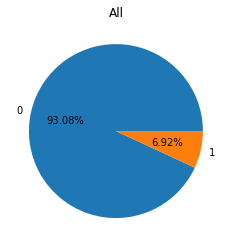

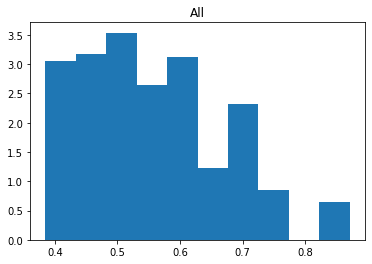

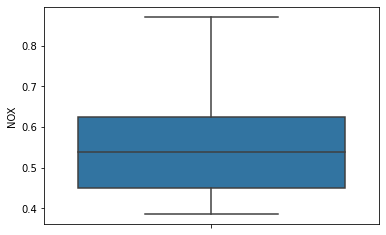

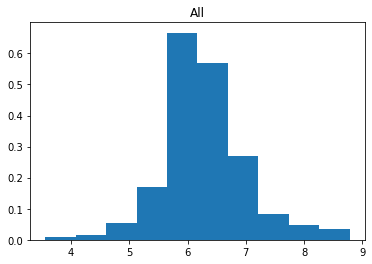

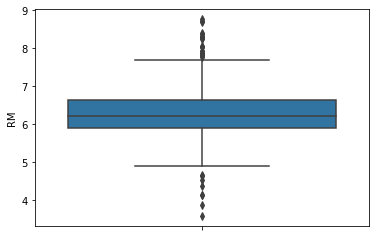

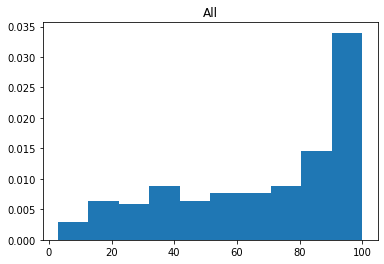

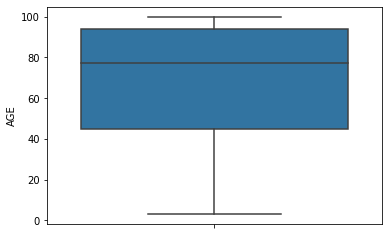

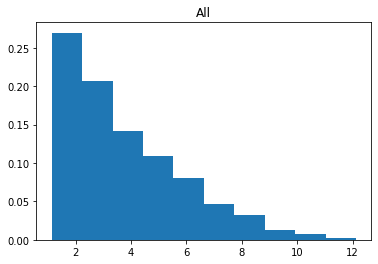

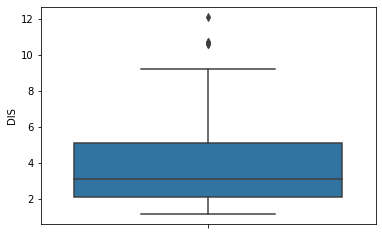

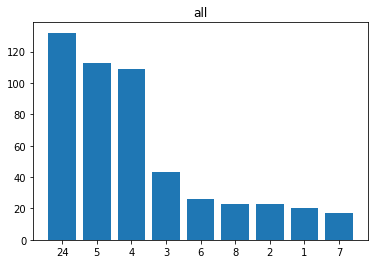

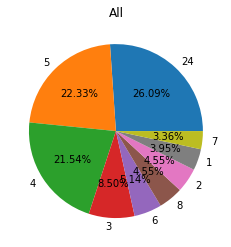

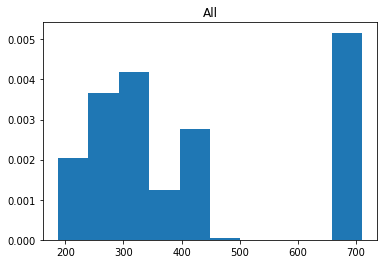

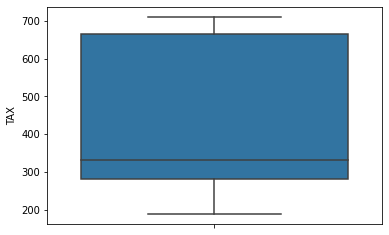

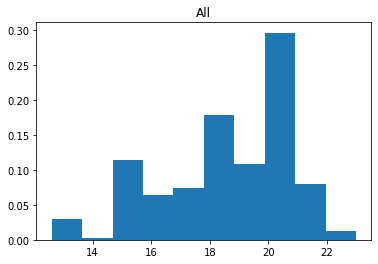

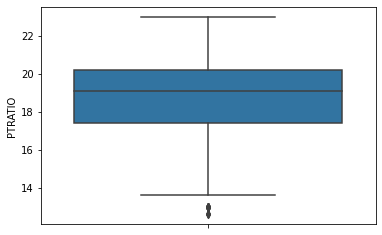

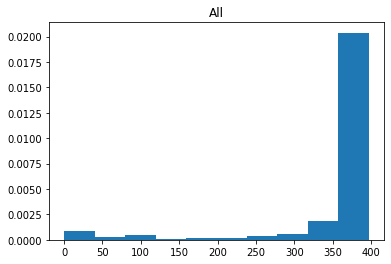

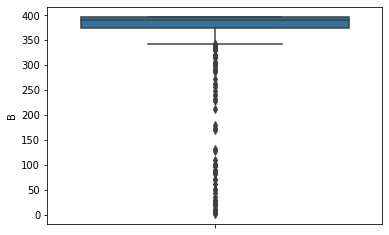

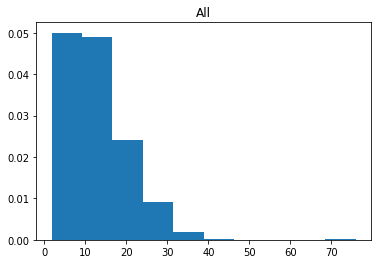

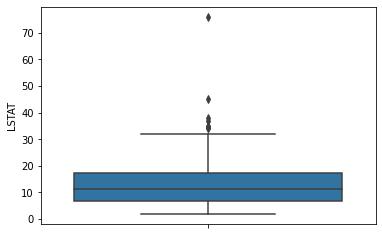

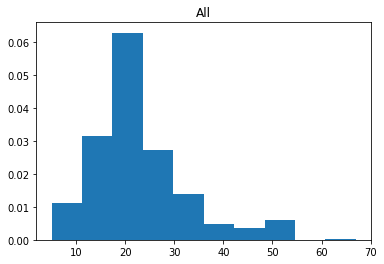

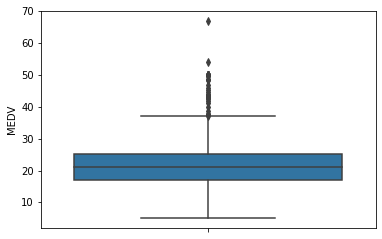

In [ ]:
 eda(df)

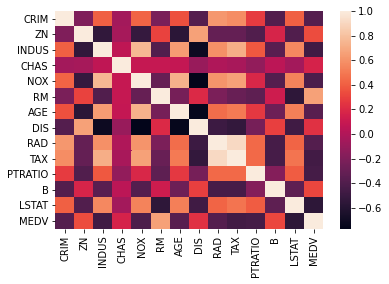

In [ ]:
 data = df.corr()
sns.heatmap(data)

In [ ]:
 data = data.sort_values(by='MEDV', ascending=False)
data['MEDV']

MEDV       1.000000
RM         0.667695
ZN         0.339327
B          0.319851
DIS        0.235206
CHAS       0.164175
AGE       -0.366717
CRIM      -0.381994
RAD       -0.382068
NOX       -0.412974
PTRATIO   -0.451117
TAX       -0.461959
INDUS     -0.466094
LSTAT     -0.562599
Name: MEDV, dtype: float64

In [ ]:
 data[(data['MEDV']> -0.4) & (data['MEDV']< 0.4)]['MEDV'].index

Index(['ZN', 'B', 'DIS', 'CHAS', 'AGE', 'CRIM', 'RAD'], dtype='object')

In [ ]:
 X = df.copy()
 
y = X[target_column]
 
X = X.drop([target_column,'ZN', 'B', 'DIS', 'CHAS', 'AGE', 'CRIM', 'RAD'], axis=1)

In [ ]:
 X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 510
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   INDUS    506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   TAX      506 non-null    int64  
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 27.7 KB


In [ ]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [ ]:
 from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
 # Import ML Libraries
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, BayesianRidge
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
 
regressors = [[LinearRegression(),'LinearRegression'],[SGDRegressor(),'SGDRegressor'], [ElasticNet(),'ElasticNet'], 
    [BayesianRidge(), 'BayesianRidge'], [LGBMRegressor(),'LGBMRegressor'], [XGBRegressor(),'XGBRegressor'],[CatBoostRegressor(verbose=0),'CatBoostRegressor'],
              [KernelRidge(),'KernelRidge'],[GradientBoostingRegressor(),'GradientBoostingRegressor'],[SVR(),'SVR'],[AdaBoostRegressor(),"AdaBoostRegressor"],[DecisionTreeRegressor(),"DecisionTreeRegressor"]]

In [ ]:
 from sklearn import metrics
 
 
for rgs in regressors:
    model = rgs[0]
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print(rgs[1])
    print("Mean Absolute Error = ", metrics.mean_absolute_error(y_test,y_pred))
    print("Mean Squared Error = ", metrics.mean_squared_error(y_test,y_pred))
    print("Root Mean Squared Error = ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print("R2 score = ", metrics.r2_score(y_test, y_pred))
    print("\n\n")

LinearRegression
Mean Absolute Error =  3.8445762855321077
Mean Squared Error =  39.63434056143487
Root Mean Squared Error =  6.295581034458604
R2 score =  0.5628046888350758



SGDRegressor
Mean Absolute Error =  3.8239160022956495
Mean Squared Error =  39.45527882904558
Root Mean Squared Error =  6.281343712060787
R2 score =  0.564779868658954



ElasticNet
Mean Absolute Error =  4.173799135881449
Mean Squared Error =  40.88541381042992
Root Mean Squared Error =  6.394170298829232
R2 score =  0.5490044501875655



BayesianRidge
Mean Absolute Error =  3.8328029166796513
Mean Squared Error =  39.26166027883204
Root Mean Squared Error =  6.2659125655272305
R2 score =  0.5669156206636254



LGBMRegressor
Mean Absolute Error =  2.2735181548234324
Mean Squared Error =  11.204577193928944
Root Mean Squared Error =  3.347323885423839
R2 score =  0.8764054468074683



[06:09:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

In [ ]:
 import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.losses import BinaryCrossentropy
from numpy.random import seed
 
seed(1234)
tf.random.set_seed(1234)

In [ ]:
 # Initialising the ANN
model = Sequential()
 
# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_shape=(X_train.shape[1],)))
 
 
 
# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))
 
 
# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))
 
 
 
# Adding the output layer
model.add(Dense(units = 1))

In [ ]:
 opt = Adam(learning_rate=0.001)
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='loss',mode='min',patience=15, verbose=1,restore_best_weights=True)
model.compile(optimizer = opt, loss = 'mean_squared_error')
model.fit(X_train, y_train, batch_size = 10, epochs = 100, callbacks = [earlystopper])

Epoch 1/100
41/41 [==============================] - 1s 2ms/step - loss: 583.6895
Epoch 2/100
41/41 [==============================] - 0s 2ms/step - loss: 402.0075
Epoch 3/100
41/41 [==============================] - 0s 1ms/step - loss: 107.8499
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: 45.8194
Epoch 5/100
41/41 [==============================] - 0s 2ms/step - loss: 39.6878
Epoch 6/100
41/41 [==============================] - 0s 2ms/step - loss: 35.1055
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 32.4562
Epoch 8/100
41/41 [==============================] - 0s 1ms/step - loss: 29.9861
Epoch 9/100
41/41 [==============================] - 0s 2ms/step - loss: 28.0892
Epoch 10/100
41/41 [==============================] - 0s 1ms/step - loss: 26.5083
Epoch 11/100
41/41 [==============================] - 0s 2ms/step - loss: 25.3728
Epoch 12/100
41/41 [==============================] - 0s 2ms/step - loss: 24.7476
Epoch 13/100
41/41 [==

In [ ]:
 y_pred = model.predict(X_test)

In [ ]:
 print("Neural Network")
print("Mean Absolute Error = ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error = ", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error = ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 score = ", metrics.r2_score(y_test, y_pred))

Neural Network
Mean Absolute Error =  2.805891743828268
Mean Squared Error =  15.73282401347427
Root Mean Squared Error =  3.9664624054028637
R2 score =  0.8264556242732941


## <strong>Memulai</strong>

Dokumen yang sedang Anda baca bukan halaman statis. Ini media interaktif bernama <strong>notebook Colab</strong> yang memungkinkan Anda menulis dan mengeksekusi kode.

Misalnya, berikut ini <strong>kode sel</strong> dengan skrip Python pendek yang mengomputasi sebuah nilai, menyimpannya dalam suatu variabel, dan mencetak hasilnya:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Untuk mengeksekusi kode dalam sel di atas, pilih kode tersebut dengan mengkliknya, kemudian tekan tombol putar di sebelah kiri kode atau gunakan pintasan keyboard "Command/Ctrl+Enter". Untuk mengedit kode, cukup klik sel dan mulai pengeditan.

Variabel yang Anda tentukan dalam sebuah sel nantinya dapat digunakan di sel lain:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Notebook Colab memungkinkan Anda menggabungkan <strong>kode yang dapat dijalankan</strong> dan <strong>rich text</strong> dalam satu dokumen, beserta <strong>gambar</strong>, <strong>HTML</strong>, <strong>LaTeX</strong>, dan lainnya. Saat Anda membuat notebook Colab Anda sendiri, notebook tersebut akan disimpan di akun Google Drive Anda. Anda dapat dengan mudah membagikan notebook Colab Anda dengan rekan kerja atau teman, sehingga memungkinkan mereka memberikan komentar di notebook Anda atau bahkan mengeditnya. Untuk mempelajari lebih lanjut, buka <a href="/notebooks/basic_features_overview.ipynb">Ringkasan Colab</a>. Untuk membuat notebook Colab baru, Anda dapat menggunakan menu File di atas, atau menggunakan link berikut: <a href="http://colab.research.google.com#create=true">buat notebook Colab baru</a>.

Notebook Colab adalah notebook Jupyter yang dihosting oleh Colab. Untuk mempelajari project Jupyter lebih lanjut, buka <a href="https://www.jupyter.org">jupyter.org</a>.

## Ilmu data

Dengan Colab, Anda dapat memanfaatkan kecanggihan library Python yang populer untuk menganalisis dan memvisualisasikan data. Sel kode di bawah menggunakan <strong>numpy</strong> untuk menghasilkan beberapa data acak, dan menggunakan <strong>matplotlib</strong> untuk memvisualisasikannya. Untuk mengedit kode, cukup klik sel dan mulai pengeditan.

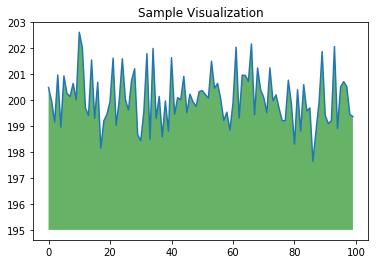

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

Anda dapat mengimpor data sendiri ke notebook Colab dari akun Google Drive Anda, termasuk dari spreadsheet, GitHub, dan berbagai sumber lainnya. Untuk mempelajari lebih lanjut pengimporan data dan bagaimana Colab dapat digunakan untuk ilmu data, lihat link di bawah pada bagian <a href="#working-with-data">Bekerja dengan Data</a>.

## Machine learning

Dengan Colab Anda dapat mengimpor set data gambar, melatih pengklasifikasi gambar pada gambar tersebut, dan mengevaluasi model, semuanya hanya dengan <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">beberapa baris kode</a>. Notebook Colab mengeksekusi kode pada server cloud Google. Itu artinya Anda dapat memanfaatkan kecanggihan hardware Google, termasuk <a href="#using-accelerated-hardware">GPU dan TPU</a>, terlepas dari mesin yang Anda gunakan. Yang Anda butuhkan hanyalah browser.

Colab digunakan secara luas di komunitas machine learning dengan berbagai penerapan meliputi:
- Memulai TensorFlow
- Mengembangkan dan melatih jaringan neural
- Bereksperimen dengan TPU
- Menyebarkan riset AI
- Membuat tutorial

Untuk melihat sampel notebook Colab yang menunjukkan penerapan machine learning, lihat <a href="#machine-learning-examples">contoh machine learning</a> di bawah.

## Referensi Lainnya

### Bekerja dengan Notebook di Colab
- [Ringkasan Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Panduan tentang Markdown](/notebooks/markdown_guide.ipynb)
- [Mengimpor library dan menginstal dependensi](/notebooks/snippets/importing_libraries.ipynb)
- [Menyimpan dan memuat notebook di GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Formulir interaktif](/notebooks/forms.ipynb)
- [Widget interaktif](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 di Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Bekerja dengan Data
- [Memuat data: Drive, Spreadsheet, dan Google Cloud Storage](/notebooks/io.ipynb) 
- [Diagram: memvisualisasikan data](/notebooks/charts.ipynb)
- [Memulai BigQuery](/notebooks/bigquery.ipynb)

### Kursus Singkat Machine Learning
Berikut adalah beberapa notebook dari kursus Machine Learning online Google. Untuk info selengkapnya, buka <a href="https://developers.google.com/machine-learning/crash-course/">situs kursus lengkap</a>.
- [Pengantar tentang Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Konsep TensorFlow](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)

<a name="using-accelerated-hardware"></a>
### Menggunakan Hardware yang Diakselerasi
- [TensorFlow dengan GPU](/notebooks/gpu.ipynb)
- [TensorFlow dengan TPU](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Contoh Machine Learning

Untuk melihat contoh menyeluruh analisis machine learning interaktif yang dimungkinkan oleh Colaboratory, buka tutorial berikut menggunakan model dari <a href="https://tfhub.dev">TensorFlow Hub</a>.

Beberapa contoh bagus:

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Melatih Kembali Pengklasifikasi Gambar</a>: Membangun model Keras di atas pengklasifikasi gambar yang telah terlatih untuk membedakan berbagai bunga.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Klasifikasi Teks</a>: Mengklasifikasikan ulasan film IMDB, baik sebagai <em>positif</em> ataupun <em>negatif</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transfer Gaya</a>: Menggunakan deep learning untuk mentransfer gaya antar-gambar.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Tanya Jawab Encoder Kalimat Universal Multibahasa</a>: Menggunakan model machine learning untuk menjawab pertanyaan dari set data SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Jenis Interpolasi Video</a>: Memprediksi apa yang terjadi dalam suatu video antara bingkai pertama dan terakhir.
